# Benchmark Dynamic network libraries

tests on dynetx and tg lib

## TGLIB


In [6]:
import pytglib as tgl  # tglib
import scipy.stats as ss  # for Kendall's tau correlation
from tqdm import tqdm
import time
import numpy as np
import random
# from benchmark_tglib import testname as btgl

statsPath = "./stats_TGLib.txt"

statsFile = open(statsPath, 'w')
statsFile.write('')
statsFile.close()

statsFile = open(statsPath, 'a')

statsFile.close()

size_big = 1
size_smol = 1

wiki_path = "../Code/Data/tgbl-wiki_edgelist_final.txt"
review_path = "../Code/Data/tgbl-review_edgelist_final.txt"
wiki_path_h = "../Code/Data/tgbl-wiki_edgelist_final_h.txt"
review_path_h = "../Code/Data/tgbl-review_edgelist_final_h.txt"

load_time_results = {}
load_time_results['tglib'] = {}
load_time_results['dynetx'] = {}
load_time_results['raphtory'] = {}

stats_time_results = {}
stats_time_results['tglib'] = {}
stats_time_results['dynetx'] = {}
stats_time_results['raphtory'] = {}

path_time_results = {}
path_time_results['tglib'] = {}
path_time_results['dynetx'] = {}
path_time_results['raphtory'] = {}

cc_time = {}
cc_time['tglib'] = {}
cc_time['dynetx'] = {}
cc_time['raphtory'] = {}

pr_time = {}
pr_time['tglib'] = {}
pr_time['dynetx'] = {}
pr_time['raphtory'] = {}

# stats_time_results

In [7]:
from benchmark_tglib import testname

res = testname.do_benchmark(wiki_path, size_smol)
print(res)


load_time_results ['tglib']['wiki'] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
stats_time_results ['tglib']['wiki'] = 0 if not "stats" in res.keys() else  res["stats"]
path_time_results ['tglib']['wiki'] = 0 if not "paths" in res.keys() else  res["paths"]
cc_time['tglib']['wiki'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
pr_time['tglib']['wiki'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

Time taken to read graph 0.17171216011047363 seconds
Time taken to get stats 0.05782270431518555 seconds 

number of nodes: 8227
number of edges: 157474
number of static edges: 18257
number of time stamps: 152757
number of transition times: 1
min. time stamp: 0
max. time stamp: 2678373
min. transition time: 1
max. transition time: 1
min. temporal in-degree: 0
max. temporal in-degree: 1937
min. temporal out-degree: 1
max. temporal out-degree: 1603


100%|██████████| 1/1 [00:02<00:00,  2.98s/it]

Time taken to get shortest paths 2.9866745471954346 seconds
Time to get clustering coefficient: 0.016679048538208008
Time to get Pagerank: 0.0011949539184570312
{'loadTime': 0.17171216011047363, 'stats': 0.05782270431518555, 'paths': 2.9866745471954346, 'clusteringCoefficient': 0.016679048538208008, 'pagerank': 0.0011949539184570312}


In [8]:
# inPath = './datasets/tgbl-wiki_edgelist_final_with_intervals.txt'


In [9]:
inPath = './datasets/tgbl-review_edgelist_final.txt'

res = testname.do_benchmark(review_path, size_smol, do_paths=False)
# print(res)

load_time_results ['tglib']['review'] = 0  if not "loadTime" in res.keys() else  res["loadTime"]
stats_time_results ['tglib']['review'] = 0  if not "stats" in res.keys() else  res["stats"]
path_time_results ['tglib']['review'] = 0  if not "paths" in res.keys() else  res["paths"]
cc_time['tglib']['review'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
pr_time['tglib']['review'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

Time taken to read graph 6.21638560295105 seconds
Time taken to get stats 3.8249082565307617 seconds 

number of nodes: 352637
number of edges: 4873540
number of static edges: 4730223
number of time stamps: 6865
number of transition times: 1
min. time stamp: 0
max. time stamp: 609379200
min. transition time: 1
max. transition time: 1
min. temporal in-degree: 0
max. temporal in-degree: 6129
min. temporal out-degree: 0
max. temporal out-degree: 627
Time to get clustering coefficient: 9.430516004562378
Time to get Pagerank: 0.1049032211303711


In [10]:
# inPath = './datasets/tgbl-review_edgelist_final_with_intervals.txt'


## DynetX

In [11]:
from tqdm import tqdm
import numpy as np

import dynetx.dynetx as dn
import dynetx.dynetx.algorithms as al
import time
import functools 
from  benchmark_DyNetX import BenchmarkDyNetX as bdyn

statsPath = "./stats_DyNetX.txt"

statsFile = open(statsPath, 'w')
statsFile.write('')
statsFile.close()

statsFile = open(statsPath, 'a')

statsFile.close()



In [12]:
res = bdyn.do_benchmark(wiki_path, size_big)
load_time_results ['dynetx']['wiki'] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
stats_time_results ['dynetx']['wiki'] = 0 if not "stats" in res.keys() else  res["stats"]
path_time_results ['dynetx']['wiki'] = 0 if not "paths" in res.keys() else  res["paths"]
cc_time['dynetx']['wiki'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
pr_time['dynetx']['wiki'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

Time taken to read graph 1.552100658416748 seconds
Time taken to get stats 0.029905080795288086 seconds
===========stats===========
num_Nodes:  8227
num_edges:  18257
number of interactions:  2633
number of timestamps:  152757
min. timestamps:  0
max. timestamps:  2678373
min in degree:  0
max in degree:  256
min out degree:  1
max out degree:  454


100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

Time taken to get and annotate 410 paths 1.0731022357940674 seconds or 0:0:1.0731022357940674


In [13]:
# inPath = './datasets/tgbl-wiki_edgelist_final_with_intervals.txt'
# bdyn.do_benchmark(inPath, size_smol)

In [14]:
res = bdyn.do_benchmark(review_path, size_big)
load_time_results ['dynetx']['review'] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
stats_time_results ['dynetx']['review'] = 0 if not "stats" in res.keys() else  res["stats"]
path_time_results ['dynetx']['review'] = 0 if not "paths" in res.keys() else  res["paths"]
cc_time['dynetx']['review'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
pr_time['dynetx']['review'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

Time taken to read graph 50.31313157081604 seconds
Time taken to get stats 6.8061559200286865 seconds
===========stats===========
num_Nodes:  352637
num_edges:  4730223
number of interactions:  1804961
number of timestamps:  6865
min. timestamps:  0
max. timestamps:  609379200
min in degree:  0
max in degree:  6082
min out degree:  0
max out degree:  592


100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

Time taken to get and annotate 17630 paths 0.25089168548583984 seconds or 0:0:0.25089168548583984


In [15]:
# inPath = './datasets/tgbl-review_edgelist_final_with_intervals.txt'
# bdyn.do_benchmark(inPath, size_smol)

## Raphtory


In [16]:
from benchmark_raphtory import BenchmarkRaphtory  as br

In [17]:
res = br.do_benchmark(wiki_path_h)
load_time_results ['raphtory']['wiki'] = 0 if not "loadTime" in res.keys() else res["loadTime"]
stats_time_results ['raphtory']['wiki'] = 0 if not "stats" in res.keys() else res["stats"]
path_time_results ['raphtory']['wiki'] = 0 if not "paths" in res.keys() else res["paths"]
cc_time['raphtory']['wiki'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
pr_time['raphtory']['wiki'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

Time to read pandas from file: 0.26


Time to load graph from pandas: 0.73
num_nodes: 8227
num_edges: 18257
min_in_deg: 0
max_in_deg: 256
min_out_deg: 1
max_out_deg: 454
min_ts: 0
max_ts: 2678374
Time to get stats: 0.05111074447631836
Time to get clustering coefficient: 0.16284990310668945
Time to get Pagerank: 0.08852052688598633


In [18]:
res = br.do_benchmark(review_path_h)
load_time_results ['raphtory']['review'] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
stats_time_results ['raphtory']['review'] = 0 if not "stats" in res.keys() else  res["stats"]
path_time_results ['raphtory']['review'] = 0 if not "paths" in res.keys() else  res["paths"]
cc_time['raphtory']['review'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
pr_time['raphtory']['review'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

Time to read pandas from file: 2.62


Time to load graph from pandas: 11.45
num_nodes: 352637
num_edges: 4730223
min_in_deg: 0
max_in_deg: 6082
min_out_deg: 0
max_out_deg: 592
min_ts: 0
max_ts: 609379201
Time to get stats: 0.2851593494415283
Time to get clustering coefficient: 4.8381898403167725
Time to get Pagerank: 0.32653236389160156


In [26]:
import pprint

# Prints the nicely formatted dictionary
pprint.pprint("load time: ")
pprint.pprint( load_time_results)
pprint.pprint("stats: " )
pprint.pprint(stats_time_results)
pprint.pprint("paths: ")
pprint.pprint( path_time_results)
pprint.pprint("cc: ")
pprint.pprint( cc_time)
pprint.pprint("pr: ")
pprint.pprint( pr_time)


'load time: '
{'dynetx': {'review': 50.31313157081604, 'wiki': 1.552100658416748},
 'raphtory': {'review': 14.070290565490723, 'wiki': 0.9920439720153809},
 'tglib': {'review': 6.21638560295105, 'wiki': 0.17171216011047363}}
'stats: '
{'dynetx': {'review': 6.8061559200286865, 'wiki': 0.029905080795288086},
 'raphtory': {'review': 0.2851593494415283, 'wiki': 0.05111074447631836},
 'tglib': {'review': 3.8249082565307617, 'wiki': 0.05782270431518555}}
'paths: '
{'dynetx': {'review': 0.25089168548583984, 'wiki': 1.0731022357940674},
 'raphtory': {'review': 0, 'wiki': 0},
 'tglib': {'review': 0, 'wiki': 2.9866745471954346}}
'cc: '
{'dynetx': {'review': 0, 'wiki': 0},
 'raphtory': {'review': 4.8381898403167725, 'wiki': 0.16284990310668945},
 'tglib': {'review': 9.430516004562378, 'wiki': 0.016679048538208008}}
'pr: '
{'dynetx': {'review': 0, 'wiki': 0},
 'raphtory': {'review': 0.32653236389160156, 'wiki': 0.08852052688598633},
 'tglib': {'review': 0.1049032211303711, 'wiki': 0.00119495391845

In [20]:
# results 
from math import sqrt
import matplotlib.pylab as plt
import numpy as np

data_sets = ['tgbl-wiki',  'tgbl-review']


{'dynetx': {'review': 50.31313157081604, 'wiki': 1.552100658416748},
 'raphtory': {'review': 14.070290565490723, 'wiki': 0.9920439720153809},
 'tglib': {'review': 6.21638560295105, 'wiki': 0.17171216011047363}}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


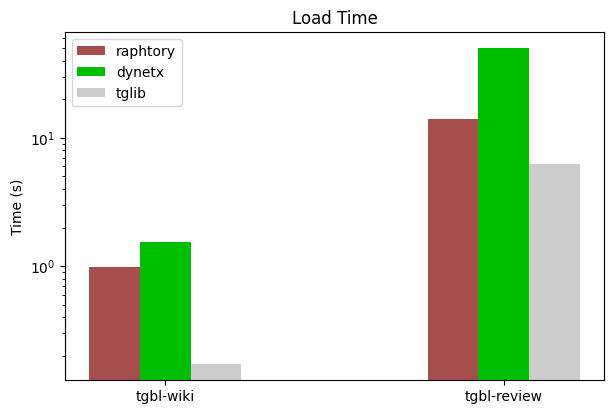

In [34]:

pprint.pprint(load_time_results)
memory_results = load_time_results
structs = ['raphtory', 'dynetx', 'tglib']
datasets = data_sets

fig, ax = plt.subplots()
width = 0.15
offset = {'raphtory': -width, 'dynetx': 0, 'tglib': width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'raphtory': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0), 'tglib': (0.8, 0.8, 0.8)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'raphtory': 'raphtory', 'dynetx': 'dynetx', 'tglib':'tglib'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

ax.set_title('Load Time')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('load time.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


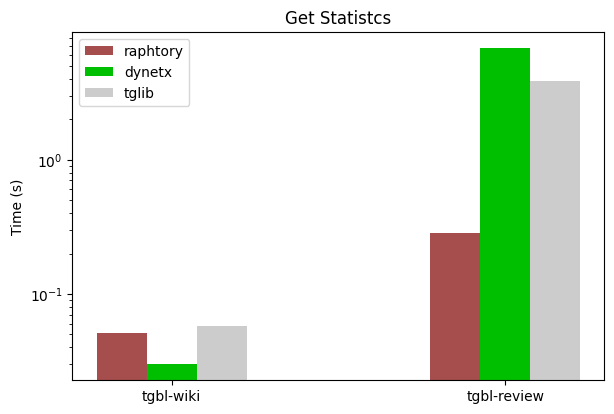

In [35]:

memory_results = stats_time_results
structs = ['raphtory', 'dynetx', 'tglib']
datasets = data_sets

fig, ax = plt.subplots()
width = 0.15
offset = {'raphtory': -width, 'dynetx': 0, 'tglib': width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'raphtory': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0), 'tglib': (0.8, 0.8, 0.8)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'raphtory': 'raphtory', 'dynetx': 'dynetx', 'tglib':'tglib'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

ax.set_title('Get Statistcs')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('stats time.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


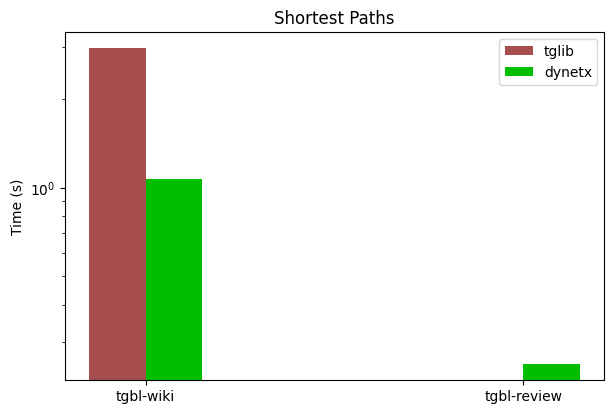

In [36]:
memory_results = path_time_results
structs = ['tglib', 'dynetx']
datasets = data_sets

fig, ax = plt.subplots()
width = 0.15
offset = {'tglib': -0.5 * width, 'dynetx': 0.5* width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'tglib': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'tglib': 'tglib', 'dynetx': 'dynetx'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

ax.set_title('Shortest Paths')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('load time.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


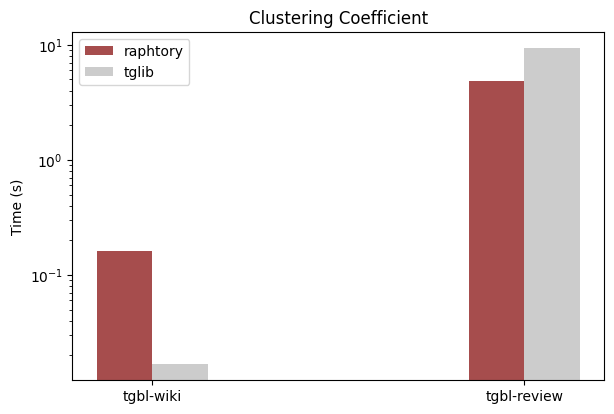

In [40]:

memory_results = cc_time
structs = ['raphtory', 'tglib']
datasets = data_sets

fig, ax = plt.subplots()
width = 0.15
offset = {'raphtory': -0.5*width, 'tglib': 0.5*width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'raphtory': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0), 'tglib': (0.8, 0.8, 0.8)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'raphtory': 'raphtory', 'dynetx': 'dynetx', 'tglib':'tglib'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

ax.set_title('Clustering Coefficient')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('stats time.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


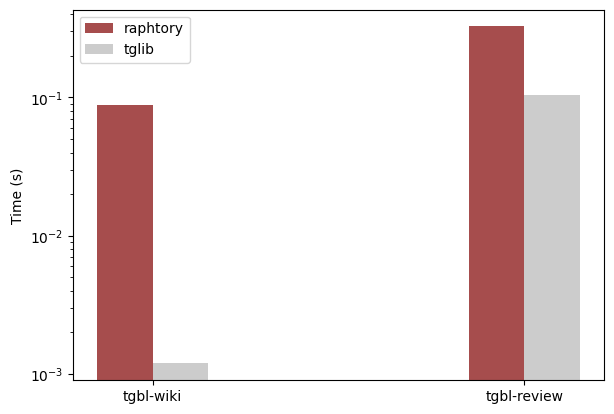

In [41]:
memory_results = pr_time
structs = ['raphtory', 'tglib']
datasets = data_sets

fig, ax = plt.subplots()
width = 0.15
offset = {'raphtory': -0.5*width, 'tglib': 0.5*width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'raphtory': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0), 'tglib': (0.8, 0.8, 0.8)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'raphtory': 'raphtory', 'dynetx': 'dynetx', 'tglib':'tglib'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

# ax.set_title('Memory')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('stats time.eps', format='eps')
plt.show()